# Chapter 14. Introduction to Network Data
## Notebook for R

In [ ]:
# Common packages used in this book
install.packages(c("glue", "tidyverse"))
# Packages for network analysis
install.packages(c("igraph"))

In [ ]:
library(glue)
library(igraph)
library(tidyverse)

### 14.1 Representing and visualizing networks


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::collapse()      masks glue::collapse()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()      

In [2]:
edges=c("Hillary Clinton", "Donald Trump", 
        "Bernie Sanders","Hillary Clinton", 
        "Hillary Clinton",  "Barack Obama", 
        "John McCain", "Donald Trump", 
        "Barack Obama", "Bernie Sanders")
g1 = make_graph(edges, directed = FALSE)
g1

IGRAPH 4d81d73 UN-- 5 5 -- 
+ attr: name (v/c)
+ edges from 4d81d73 (vertex names):
[1] Hillary Clinton--Donald Trump   Hillary Clinton--Bernie Sanders
[3] Hillary Clinton--Barack Obama   Donald Trump   --John McCain   
[5] Bernie Sanders --Barack Obama  

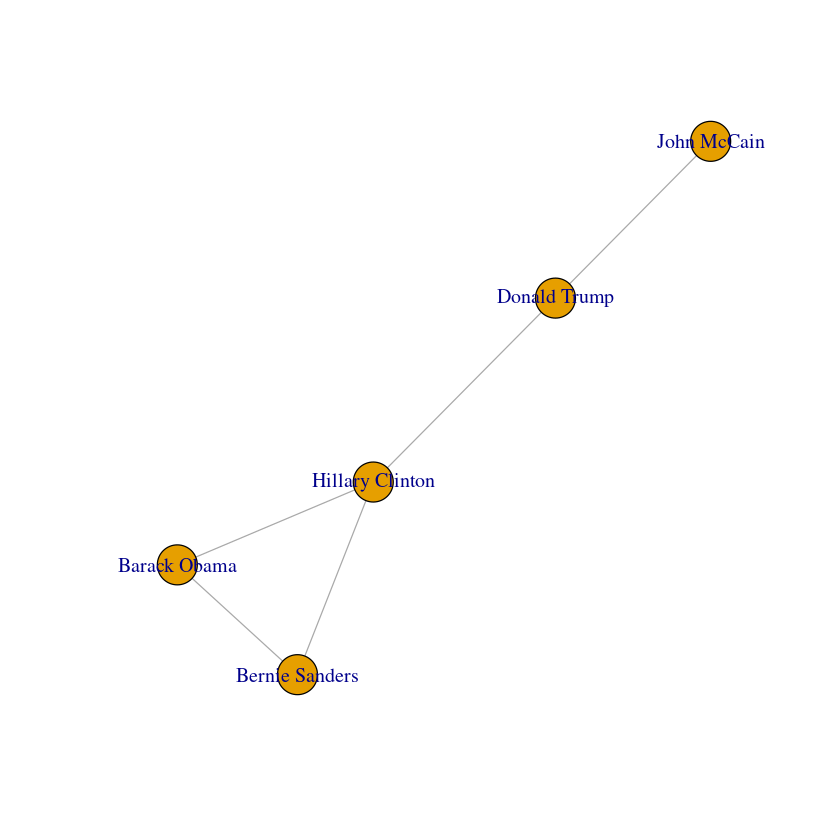

In [3]:
plot(g1)

In [4]:
edges = c(edges, 
          "Hillary Clinton", "Bernie Sanders",
          "Barack Obama","Hillary Clinton")
g2 = make_graph(edges, directed = TRUE)
glue("Imaginary Twitter network of 5 American politicians")
print(g2)

Imaginary Twitter network of 5 American politicians

IGRAPH 8e3492e DN-- 5 7 -- 
+ attr: name (v/c)
+ edges from 8e3492e (vertex names):
[1] Hillary Clinton->Donald Trump    Bernie Sanders ->Hillary Clinton
[3] Hillary Clinton->Barack Obama    John McCain    ->Donald Trump   
[5] Barack Obama   ->Bernie Sanders  Hillary Clinton->Bernie Sanders 
[7] Barack Obama   ->Hillary Clinton


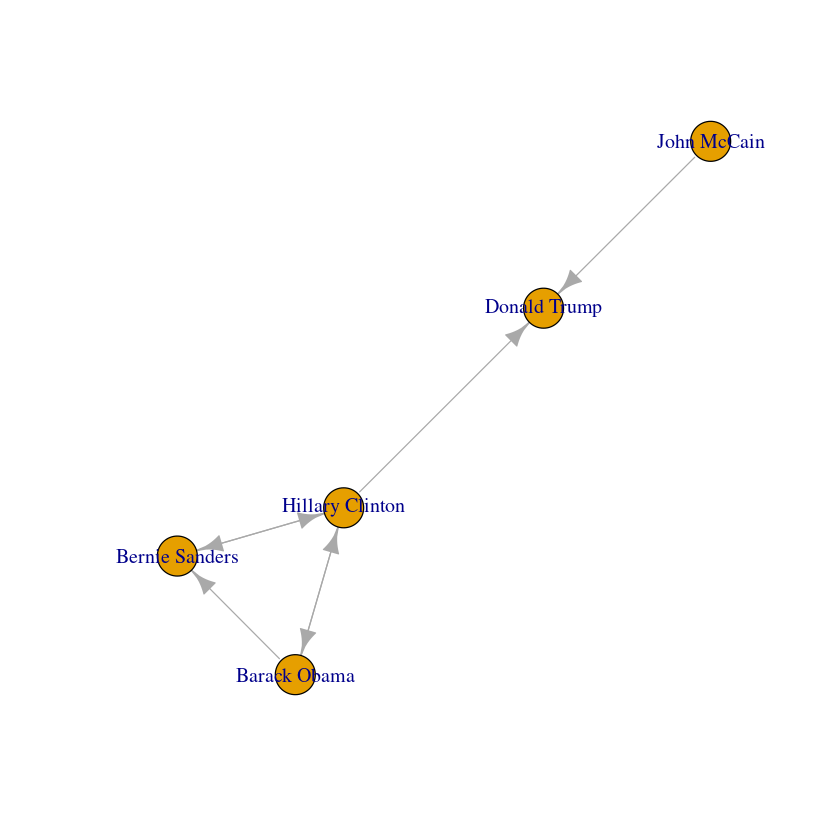

In [5]:
plot(g2)

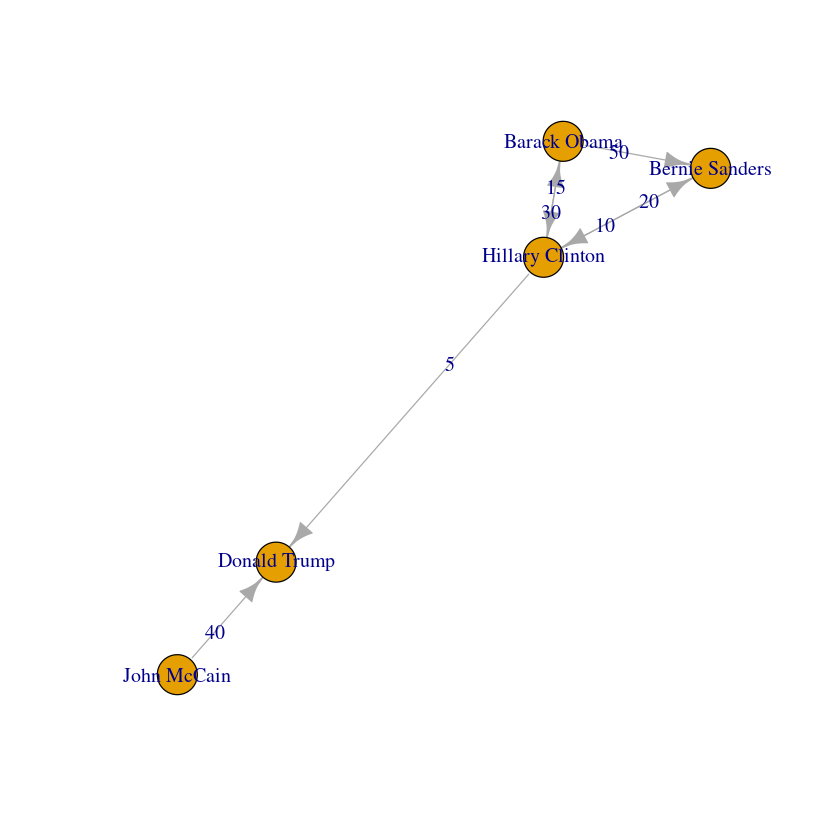

In [6]:
E(g2)$weight = c(5, 20, 30, 40, 50, 10, 15)
plot(g2, edge.label = E(g2)$weight)

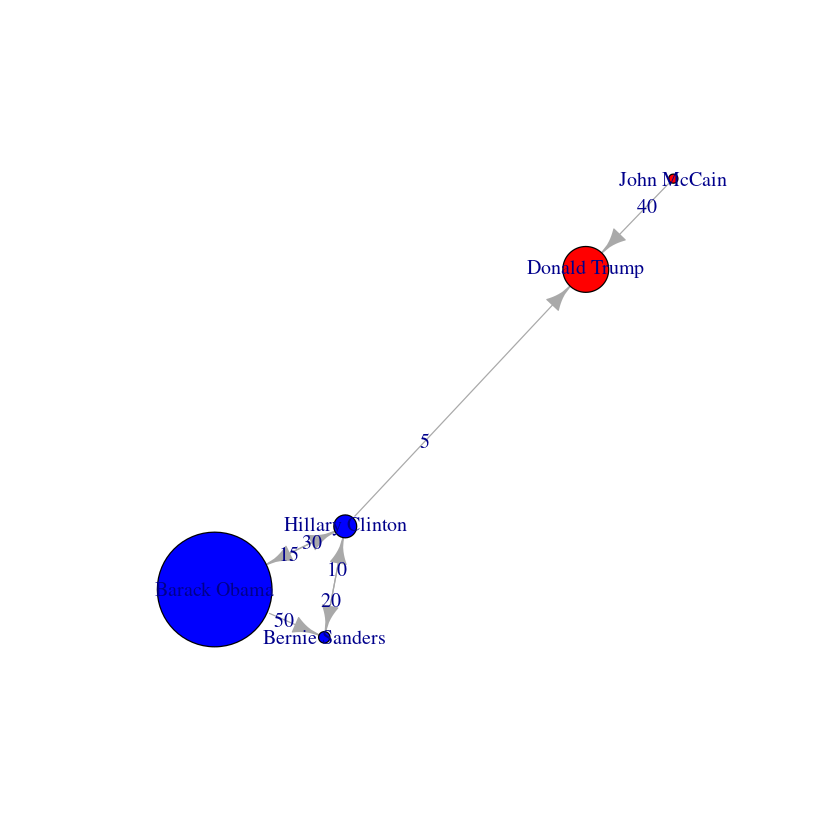

In [7]:
V(g2)$followers = c(100000, 200000, 50000, 500000, 40000)
V(g2)$party <- c("Democrat", "Republican", "Democrat", "Democrat", "Republican")
V(g2)$color = V(g2)$party
V(g2)$color = gsub("Democrat", "blue", V(g2)$color)
V(g2)$color = gsub("Republican", "red", V(g2)$color)
plot(g2, edge.label = E(g2)$weight, vertex.size = V(g2)$followers*0.0001)


In [8]:
g3 = induced_subgraph(g1, c(1,3,4))
glue("Democrats subgraph")
print(g3)
g4 = induced_subgraph(g1, c(2,5))
glue("Republicans subgraph")
print(g4)

Democrats subgraph

IGRAPH 6574ce8 UN-- 3 3 -- 
+ attr: name (v/c)
+ edges from 6574ce8 (vertex names):
[1] Hillary Clinton--Bernie Sanders Hillary Clinton--Barack Obama  
[3] Bernie Sanders --Barack Obama  


Republicans subgraph

IGRAPH 4d7a301 UN-- 2 1 -- 
+ attr: name (v/c)
+ edge from 4d7a301 (vertex names):
[1] Donald Trump--John McCain



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_character()
)




Nodes: 5  Edges: 7

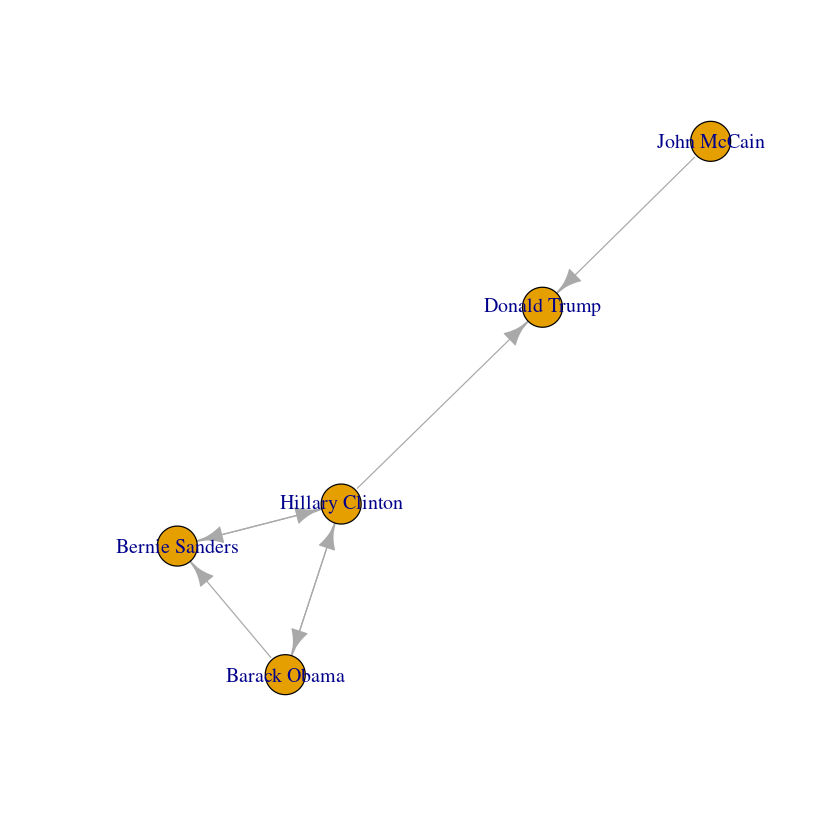

In [9]:
edges = read_csv("http://cssbook.net/d/politicians_twitter.csv", col_names=FALSE)
g2 = graph_from_data_frame(d=edges) 
glue("Nodes: ", gorder(g2), "  Edges: ", gsize(g2))
plot(g2)

### 14.2 Social network analysis

In [10]:
all_simple_paths(g1, "Barack Obama", "John McCain", mode = c("all"))

[[1]]
+ 4/5 vertices, named, from 4d81d73:
[1] Barack Obama    Hillary Clinton Donald Trump    John McCain    

[[2]]
+ 5/5 vertices, named, from 4d81d73:
[1] Barack Obama    Bernie Sanders  Hillary Clinton Donald Trump   
[5] John McCain    


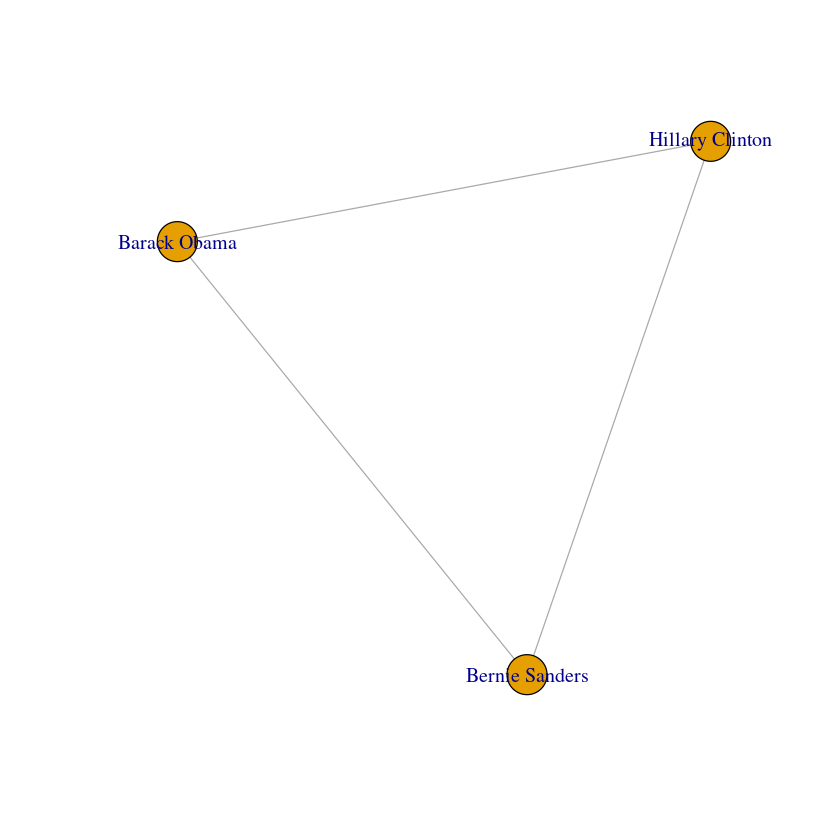

In [11]:
plot(g3)

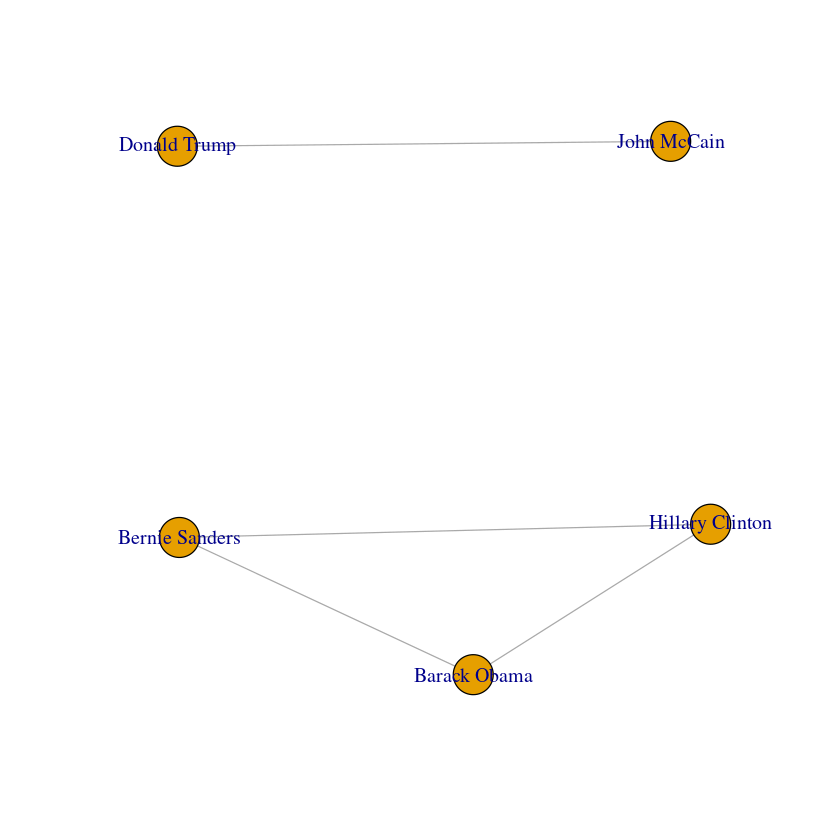

In [12]:
#Remove the friendship between Clinton and Trump in Facebook
g6 = delete.edges(g1, E(g1, P=c("Hillary Clinton","Donald Trump")) )
plot(g6)

In [13]:
glue("Average path length in Facebook network: ", mean_distance(g1, directed = T))
glue('Distance between Obama and McCain in Facebook network: ', distances(g1, v="Barack Obama", to="John McCain", weights=NA))

Average path length in Facebook network: 1.7

Distance between Obama and McCain in Facebook network: 3

In [14]:
#mode: all, out, in
glue("Incident edges of John McCain in Facebook Network:")
incident(g1, V(g1)["John McCain"], mode="all")
glue("Neighbors of John McCain in Facebook Network:")
neighbors(g1, V(g1)["John McCain"], mode="all")

Incident edges of John McCain in Facebook Network:

+ 1/5 edge from 4d81d73 (vertex names):
[1] Donald Trump--John McCain

Neighbors of John McCain in Facebook Network:

+ 1/5 vertex, named, from 4d81d73:
[1] Donald Trump

In [15]:
glue("Density in Facebook network: ", edge_density(g1))
glue("Density in Twitter network: ", ecount(g2)/(vcount(g2)*(vcount(g2)-1)) )
glue("Transitivity in Facebook network: ", transitivity(g1), type="global")
glue("Diameter in Facebook network: ", diameter(g1, directed = F, weights = NA))
glue("Reciprocity in Twitter network: ", reciprocity(g2))

Density in Facebook network: 0.5

Density in Twitter network: 0.35

Transitivity in Facebook network: 0.5

Diameter in Facebook network: 3

Reciprocity in Twitter network: 0.571428571428571

In [16]:
print("Degree centrality of the Facebook network (undirected):" )
print(degree(g1, normalized = T))
print("Degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="all"))
print("In degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="in"))
print("Out degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="out"))

[1] "Degree centrality of the Facebook network (undirected):"
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
           0.75            0.50            0.50            0.50            0.25 
[1] "Degree centrality of the Twitter network (directed):"
Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           1.25            0.75            0.25            0.75            0.50 
[1] "In degree centrality of the Twitter network (directed):"
Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           0.50            0.50            0.00            0.25            0.50 
[1] "Out degree centrality of the Twitter network (directed):"
Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           0.75            0.25            0.25            0.50            0.00 


In [17]:
print("Closeness centrality of the Facebook network (undirected):" )
print(closeness(g1, normalized = T))
print("Eigenvector centrality of the Facebook network (undirected):" )
print(eigen_centrality(g1, scale=F)$vector)
print("Betweenness centrality of the Facebook network (undirected):" )
print(betweenness(g1, normalized = T))

[1] "Closeness centrality of the Facebook network (undirected):"
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.8000000       0.6666667       0.5714286       0.5714286       0.4444444 
[1] "Eigenvector centrality of the Facebook network (undirected):"
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.6037035       0.3424853       0.4971537       0.4971537       0.1546684 
[1] "Betweenness centrality of the Facebook network (undirected):"
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.6666667       0.5000000       0.0000000       0.0000000       0.0000000 


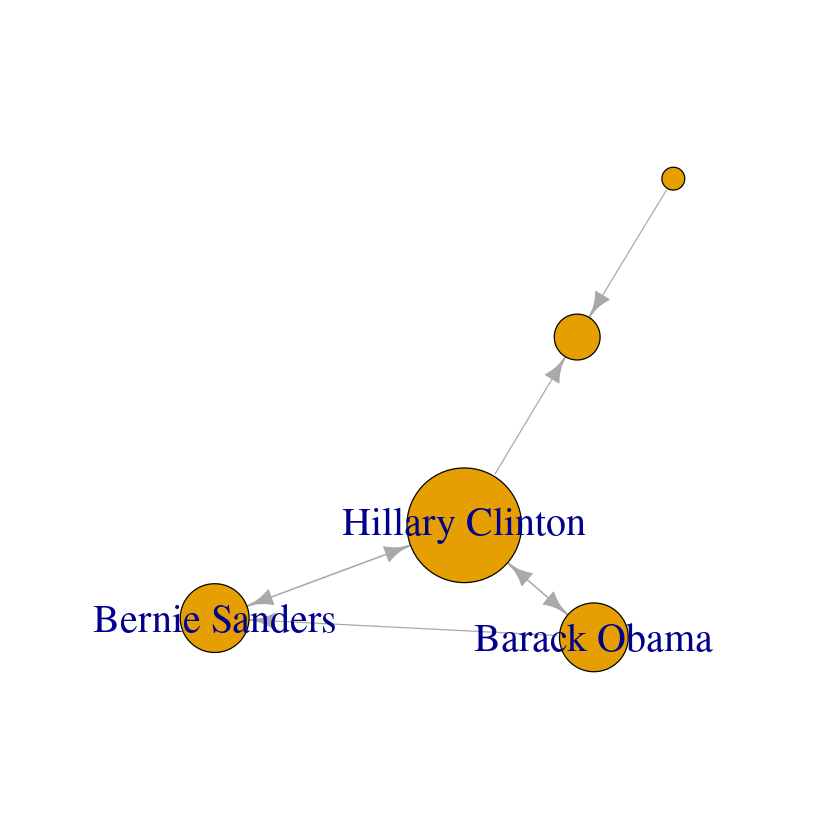

In [18]:
plot(g2, vertex.label.cex = 2, vertex.size=degree(g2, normalized = T)*40, vertex.label = ifelse(degree(g2, normalized = T) > 0.5, V(g2)$name, NA))

In [19]:
glue("Number of cliques: {clique_num(g1)}")
max_cliques(g1)

Number of cliques: 3

[[1]]
+ 2/5 vertices, named, from 4d81d73:
[1] Donald Trump John McCain 

[[2]]
+ 2/5 vertices, named, from 4d81d73:
[1] Donald Trump    Hillary Clinton

[[3]]
+ 3/5 vertices, named, from 4d81d73:
[1] Hillary Clinton Bernie Sanders  Barack Obama   


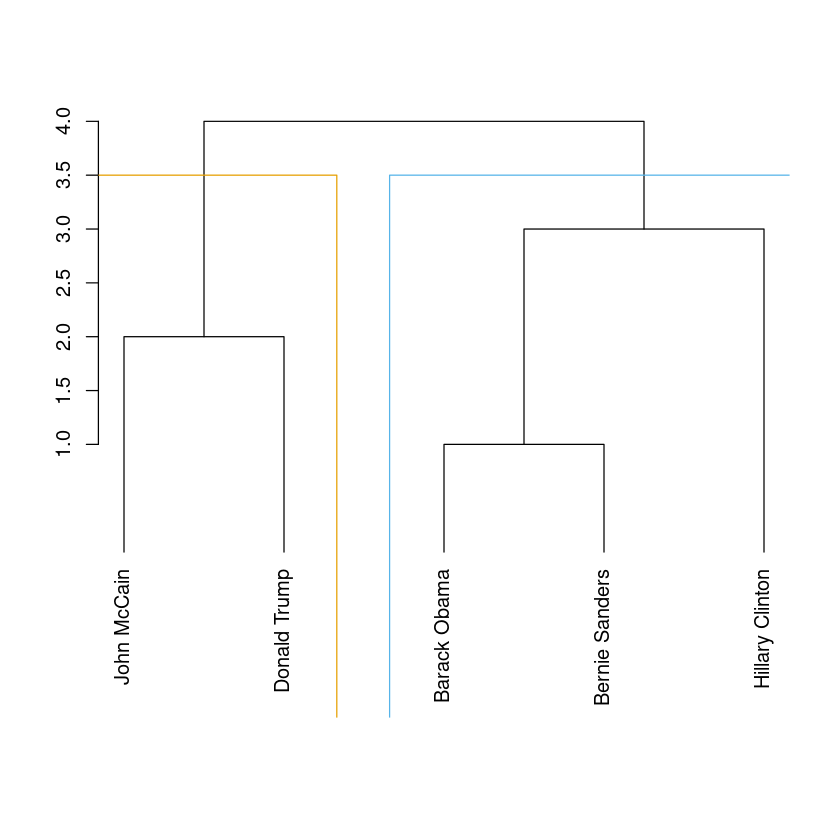

In [20]:
cluster1 = cluster_edge_betweenness(g1) 
dendPlot(cluster1, mode="hclust")

In [29]:
print("Girvan-Neuman")
cluster2 = cluster_louvain(g1) 
print(glue("Length: {length(cluster1)}"))
print(glue("Modularity: {modularity(cluster1)}"))
print(membership(cluster1))

[1] "Girvan-Neuman"
Length: 2
Modularity: 0.22
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 


In [28]:
print("Louvain:")
cluster2 = cluster_louvain(g1) 
print(glue("Length: {length(cluster2)}"))
print(glue("Modularity: {modularity(cluster2)}"))
print(membership(cluster2))

print("Greedy optimization:")
cluster3 = cluster_fast_greedy(g1) 
print(glue("Length: {length(cluster3)}"))
print(glue("Modularity: {modularity(cluster3)}"))
print(membership(cluster3))

print("Label propagation:")
cluster4 = cluster_label_prop(g1) 
print(glue("Label propagation: Length {length(cluster4)}"))
print(glue("Modularity: {modularity(cluster4)}"))
print(membership(cluster4))

[1] "Louvain:"
Length: 2
Modularity: 0.22
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 
[1] "Greedy optimization:"
Length: 2
Modularity: 0.22
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 
[1] "Label propagation:"
Label propagation: Length 1
Modularity: 0
Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               1               1               1               1 


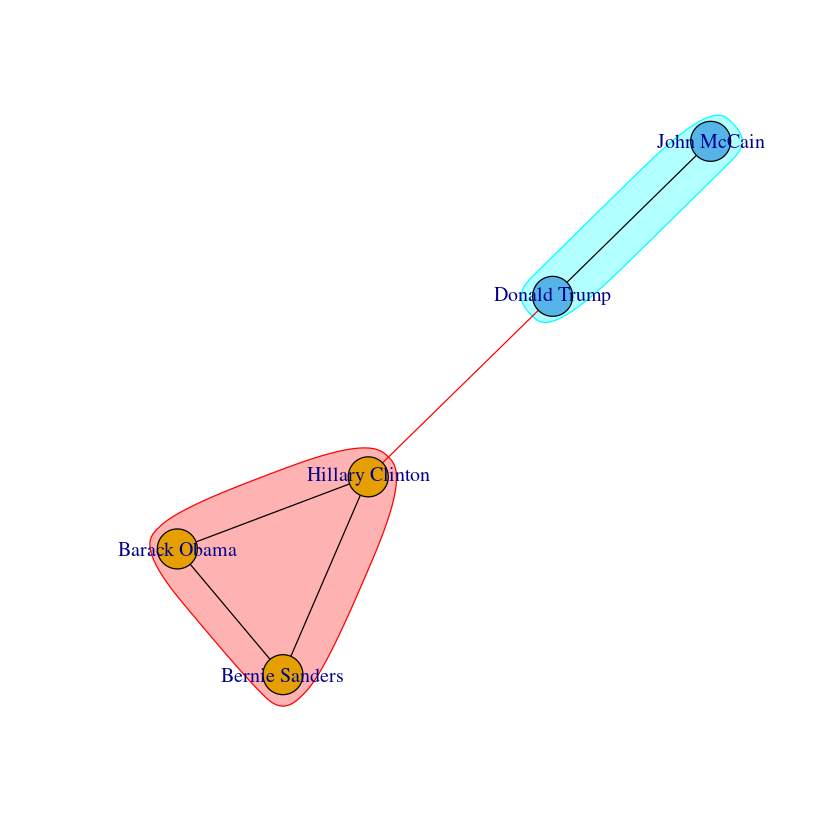

In [23]:
plot(cluster3, g1)